In [1]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_excel('/content/SOUND_METER_DATA.xlsx').iloc[:,0:4]
print(df.head)

<bound method NDFrame.head of    Welding Type        Industry  Distance  Average
0          SMAW   Electro Power        12  118.500
1          SMAW   Electro Power        14  109.833
2          SMAW   Electro Power        16  103.800
3          SMAW   Electro Power        18  106.800
4          SMAW   Electro Power        20  115.000
5          SMAW   Electro Power        22  112.000
6          SMAW   Electro Power        24  111.000
7          SMAW   Electro Power        26  102.200
8          SMAW   Electro Power        28   60.330
9          SMAW   Electro Power        30  102.750
10         SMAW   Electro Power        32   85.000
11         SMAW   Electro Power        34  100.660
12         SMAW   Electro Power        36   92.250
13         SMAW   Electro Power        38   85.428
14         SMAW  Prakash Diesel        12  110.466
15         SMAW  Prakash Diesel        14  113.360
16         SMAW  Prakash Diesel        16  112.909
17         SMAW  Prakash Diesel        18  116.140
1

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer([('encoder', OneHotEncoder(), ['Welding Type','Industry'])], remainder='passthrough')
transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
transformed_df

,encoder__Welding Type_MIG,encoder__Welding Type_SMAW,encoder__Industry_Electro Power,encoder__Industry_Garg Overseas,encoder__Industry_Prakash Diesel,remainder__Distance,remainder__Average
0,0.0,1.0,1.0,0.0,0.0,12.0,118.500
1,0.0,1.0,1.0,0.0,0.0,14.0,109.833
2,0.0,1.0,1.0,0.0,0.0,16.0,103.800
3,0.0,1.0,1.0,0.0,0.0,18.0,106.800
4,0.0,1.0,1.0,0.0,0.0,20.0,115.000
5,0.0,1.0,1.0,0.0,0.0,22.0,112.000
6,0.0,1.0,1.0,0.0,0.0,24.0,111.000
7,0.0,1.0,1.0,0.0,0.0,26.0,102.200
8,0.0,1.0,1.0,0.0,0.0,28.0,60.330
9,0.0,1.0,1.0,0.0,0.0,30.0,102.750


In [4]:
np.random.seed(10)
train,test = np.split(transformed_df,[int(.8*len(df))])
X = transformed_df.iloc[:,0:6]
Y = transformed_df.iloc[:,6:7]
x_train = train.iloc[:,0:6]
x_test = test.iloc[:,0:6]
Trans_x_train = x_train.iloc[:,0:6]
Trans_x_test = x_test.iloc[:,0:6]
y_train = train.iloc[:,6:7].to_numpy()
y_test = test.iloc[:,6:7].to_numpy()

Training Time = 0.021441936492919922 seconds
Prediction Time = 648.2601165771484 microseconds
Root mean squared error = 6.414254901727183


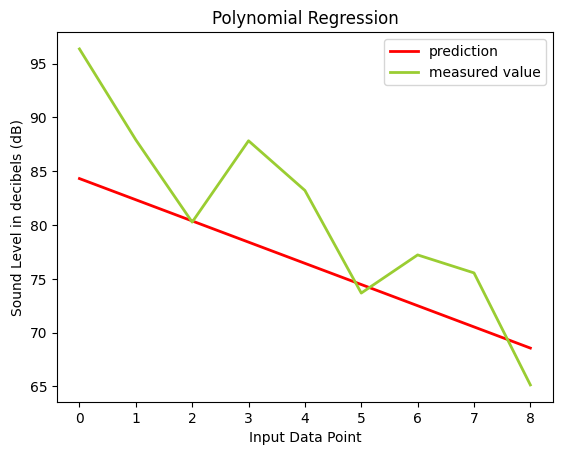

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
plt.figure()

poly = PolynomialFeatures(degree=1, include_bias=False)
poly_features = poly.fit_transform(Trans_x_train)
poly_features_test = poly.transform(Trans_x_test)
start_time = time.time()
poly_reg = LinearRegression()

start_time = time.time()
poly_reg.fit(poly_features,y_train)
end_time = time.time()
print("Training Time = "+str(end_time - start_time)+" seconds")

start_time = time.time()
prediction = poly_reg.predict(poly_features_test)
end_time = time.time()
print("Prediction Time = "+str((end_time - start_time)*1000000)+" microseconds")

errors = mean_squared_error(y_test, prediction, squared=False)
print("Root mean squared error = "+ str(errors))


###Plot actual vs prediction Value
value = [i for i in range(0, len(y_test))]
plt.plot(value, prediction, color="red", label="prediction", linewidth=2)
plt.plot(value, y_test, color="yellowgreen", label="measured value", linewidth=2)
plt.xlabel("Input Data Point")
plt.ylabel("Sound Level in decibels (dB)")
plt.title("Polynomial Regression")
plt.legend()
plt.savefig("Sound Polynomial Regression.png",dpi=500)
plt.show()

Training Time = 0.12904834747314453 seconds
Prediction Time = 1337.0513916015625 microseconds
16.929754726844422


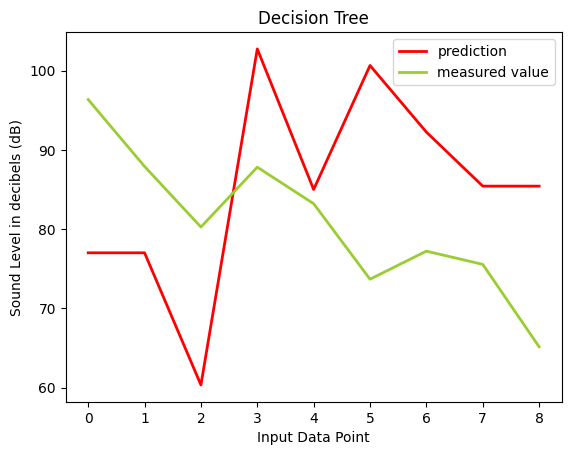

Time Elapsed = 0.8796331882476807 seconds


In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
plt.figure()

start_time = time.time()
model_temp = DecisionTreeRegressor()
param_grid = {'max_depth': [2, 6, 10, 14, 20,30,None]}

dt_reg = GridSearchCV(model_temp,param_grid,cv=5)

start_time = time.time()
dt_reg.fit(Trans_x_train,y_train)
end_time = time.time()
print("Training Time = "+str(end_time - start_time)+" seconds")

start_time = time.time()
prediction = dt_reg.predict(Trans_x_test)
end_time = time.time()
print("Prediction Time = "+str((end_time - start_time)*1000000)+" microseconds")

errors = mean_squared_error(y_test, prediction, squared=False)
print(errors)

###Plot actual vs prediction Value
value = [i for i in range(0, len(y_test))]
plt.plot(value, prediction, color="red", label="prediction", linewidth=2)
plt.plot(value, y_test, color="yellowgreen", label="measured value", linewidth=2)
plt.xlabel("Input Data Point")
plt.ylabel("Sound Level in decibels (dB)")
plt.title("Decision Tree")
plt.legend()
plt.savefig("Sound Decision Tree.png",dpi=500)
plt.show()
end_time = time.time()
print("Time Elapsed = "+str(end_time - start_time)+" seconds")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Training Time = 0.763913631439209 seconds
Prediction Time = 2108.335494995117 microseconds
6.003979017994276


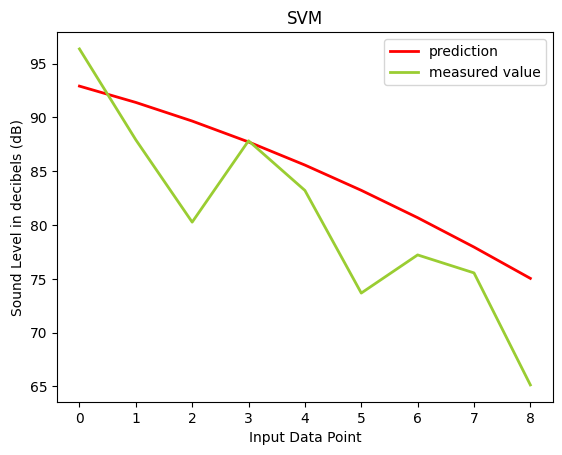

In [7]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
plt.figure()
model_temp = SVR()
param_grid = {'C': [0.1, 1, 10, 100, 10000],
              'gamma': [10000,10,1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

svc_reg = GridSearchCV(model_temp,param_grid,cv=5)

start_time = time.time()
svc_reg.fit(Trans_x_train,y_train)
end_time = time.time()
print("Training Time = "+str(end_time - start_time)+" seconds")


start_time = time.time()
prediction = svc_reg.predict(Trans_x_test)
end_time = time.time()
print("Prediction Time = "+str((end_time - start_time)*1000000)+" microseconds")

errors = mean_squared_error(y_test, prediction, squared=False)
print(errors)

###Plot actual vs prediction Value
value = [i for i in range(0, len(y_test))]
plt.plot(value, prediction, color="red", label="prediction", linewidth=2)
plt.plot(value, y_test, color="yellowgreen", label="measured value", linewidth=2)
plt.xlabel("Input Data Point")
plt.ylabel("Sound Level in decibels (dB)")
plt.title("SVM")
plt.legend()

plt.savefig("Sound SVC.png",dpi=500)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Training Time = 132.583651304245 seconds
Prediction Time = 15854.120254516602 microseconds
9.94331969416637


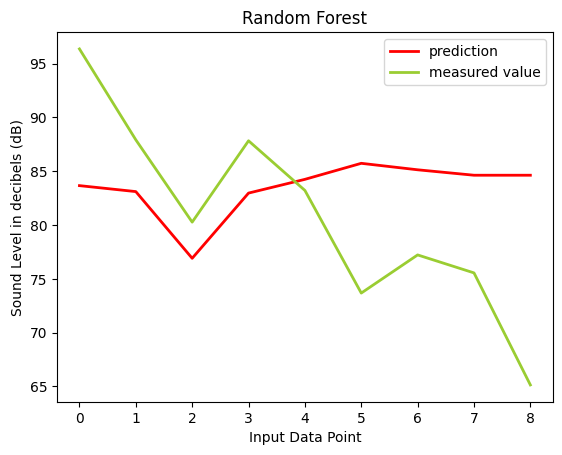

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
plt.figure()


model_temp = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 150,200,250],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

rf_reg = GridSearchCV(model_temp,param_grid,cv=5)

start_time = time.time()
rf_reg.fit(Trans_x_train,y_train)
end_time = time.time()
print("Training Time = "+str(end_time - start_time)+" seconds")

start_time = time.time()
prediction = rf_reg.predict(Trans_x_test)
end_time = time.time()
print("Prediction Time = "+str((end_time - start_time)*1000000)+" microseconds")

errors = mean_squared_error(y_test, prediction, squared=False)
print(errors)

###Plot actual vs prediction Value
value = [i for i in range(0, len(y_test))]
plt.plot(value, prediction, color="red", label="prediction", linewidth=2)
plt.plot(value, y_test, color="yellowgreen", label="measured value", linewidth=2)
plt.xlabel("Input Data Point")
plt.ylabel("Sound Level in decibels (dB)")
plt.title("Random Forest")
plt.legend()

plt.savefig('Sound Random Forest.png',dpi=500)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed w

Training Time = 93.83371686935425 seconds
Prediction Time = 3984.9281311035156 microseconds
38.11632444907564


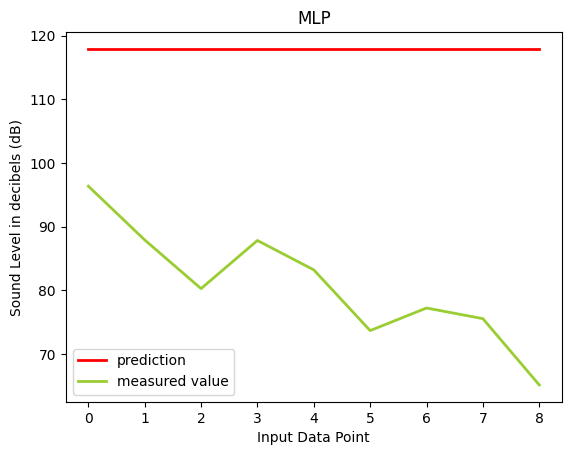

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
plt.figure()

model_temp = MLPRegressor()
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [500, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

mpl_reg = GridSearchCV(model_temp,param_grid,scoring='neg_root_mean_squared_error',cv=5)

start_time = time.time()
mpl_reg.fit(Trans_x_train,y_train)
end_time = time.time()
print("Training Time = "+str(end_time - start_time)+" seconds")

start_time = time.time()
prediction = mpl_reg.predict(Trans_x_test)
end_time = time.time()
print("Prediction Time = "+str((end_time - start_time)*1000000)+" microseconds")

errors = mean_squared_error(y_test, prediction, squared=False)
print(errors)

###Plot actual vs prediction Value
value = [i for i in range(0, len(y_test))]
plt.plot(value, prediction, color="red", label="prediction", linewidth=2)
plt.plot(value, y_test, color="yellowgreen", label="measured value", linewidth=2)
plt.xlabel("Input Data Point")
plt.ylabel("Sound Level in decibels (dB)")
plt.title("MLP")
plt.legend()

plt.savefig("Sound MLP.png",dpi=500)
plt.show()

In [ ]:
print("K fold cross validation scores for k = 5 are as follows :")

print("Polynomial Regression:")
scores = cross_val_score(poly_reg, X, Y, cv=5,scoring = 'neg_root_mean_squared_error')
print("Scores:",scores,end = "\n")
print("Mean:",scores.mean(),end = "\n\n")

print("Decision Tree Regression:")
scores = cross_val_score(dt_reg, X, Y, cv=5,scoring = 'neg_root_mean_squared_error')
print("Scores:",scores,end = "\n")
print("Mean:",scores.mean(),end = "\n\n")

print("Support Vector Machine Regression:")
scores = cross_val_score(svc_reg, X, Y, cv=5,scoring = 'neg_root_mean_squared_error')
print("Scores:",scores,end = "\n")
print("Mean:",scores.mean(),end = "\n\n")


print("Random Forest Regression:")
scores = cross_val_score(rf_reg, X, Y, cv=5,scoring = 'neg_root_mean_squared_error')
print("Scores:",scores,end = "\n")
print("Mean:",scores.mean(),end = "\n\n")

print("Multilayer Perceptron Regression:")
scores = cross_val_score(mpl_reg, X, Y, cv=5,scoring = 'neg_root_mean_squared_error')
print("Scores:",scores,end = "\n")
print("Mean:",scores.mean(),end = "\n\n")

Random Forest Regression:


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

KeyboardInterrupt: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

[14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]
[14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

[14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]
[14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]


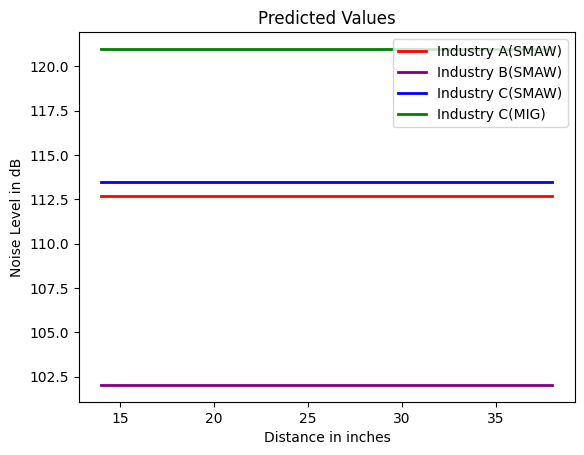

In [9]:
data = [["SMAW","Electro Power",0,0],["SMAW","Garg Overseas ",0,0],["SMAW","Prakash Diesel",0,0],["MIG","Prakash Diesel",0,0]]
sim_data1=pd.DataFrame(data,columns=['Welding Type','Industry','Distance','Average'])

sim_data1 = transformer.transform(sim_data1)

sim_data1_x = []
for x in sim_data1:
  sim_data1_x.append(x[0:6])

colors =["red","purple","blue",'green']
sim_data1_x = pd.DataFrame(sim_data1_x,columns = list(set(transformer.get_feature_names_out())-set(["remainder__Average"])))
result=[[],[],[],[]]
plt.figure()
Industries = ["Industry A(SMAW)","Industry B(SMAW)", "Industry C(SMAW)","Industry C(MIG)"]
for i,row in sim_data1_x.iterrows():
  result[i] = []
  distanceList = []
  for distance in range(14,40,2):
    row['remainder__Distance']=distance
    pred = rf_reg.predict([row])[0]
    distanceList.append(distance)
    result[i].append(pred)
  plt.plot(distanceList,result[i], color=colors[i], label=Industries[i], linewidth=2)
  print(distanceList)
plt.xlabel("Distance in inches")
plt.ylabel("Noise Level in dB")
plt.title("Predicted Values")
plt.legend()
plt.savefig("Noise pred.png")
plt.show()